# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')

df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [8]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1. Is the distribution of body temperatures normal?


C:\Users\Abha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


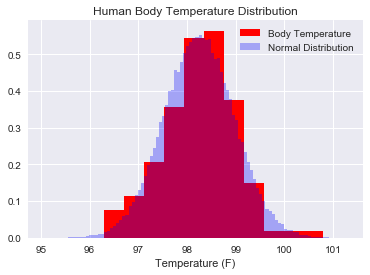

In [33]:
sns.set()

temp = df.temperature

#commonly used rule to find number of bins
num_bins = int(np.sqrt(len(temp)))

temp_mean = np.mean(temp)
temp_std = np.std(temp)
temp_normal = np.random.normal(temp_mean, temp_std, 100000)

#comparing "Body Temperature" to the Normal Distribution
plt.hist(temp, bins=num_bins, color='red', label='Body Temperature', normed=True)
plt.hist(temp_normal, bins = 100, color='blue', alpha=0.3, label='Normal Distribution', normed=True)
plt.title('Human Body Temperature vs. Normal Distribution')
plt.xlabel('Temperature (F)')
plt.legend()
plt.show()


While the histogram shows that a normal distribution possibly exists, it is not yet clear. I will do further EDA and create an ECDF. 

In [40]:
#create ECDF function rule
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

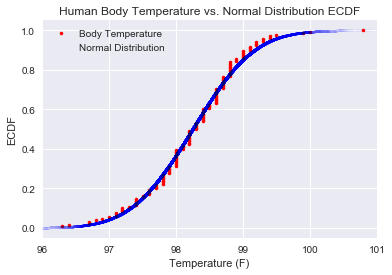

In [55]:
#Compare ECDF graphs of body temperature and normal distribution
x_temp, y_temp = ecdf(temp)
x_normal, y_normal = ecdf(temp_normal)

plt.plot(x_temp, y_temp, marker='.', linestyle='none', color='red', label = 'Body Temperature')
plt.plot(x_normal, y_normal, marker='.', linestyle='none', color='blue', label = 'Normal Distribution', alpha=0.009)
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.title('Human Body Temperature vs. Normal Distribution ECDF')
plt.legend()
plt.xlim(96,101)
plt.show()

The ECDF graph shows a more clearer picture that the Body Temperature is normal than the histogram. 

### 2. Is the sample size large? Are the observations independent?

"The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution."

The sample size is 130 from the describe() function above. That is greater than 30, which makes the sample size large enough. 

The observations are independent of each other as its individual human body temperatures. 

### 3. Is the true population mean really 98.6 degrees F?

##### First, try a bootstrap hypothesis test.

In [93]:
def draw_bs_reps(data, func, size=1):
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
        
        return bs_replicates
    
    
bs_replicates_temp = draw_bs_reps(temp, np.mean, size=100000)

p = np.sum(bs_replicates_temp >= 98.6) / len(bs_replicates_temp)


print('The p-value is', + p)

The p-value is 0.0


The p-value is 0.0 or extremely small. This suggests that after 100,000 sampling, the mean temperature is not 98.6 degrees F.

Let us calculate the confidence interval of 95% to see if the mean is 98.6 degrees F. 

In [134]:
#Confidence interval of 95%
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return print('Confidence interval is:',+ m-h, m+h)

mean_confidence_interval(temp)

Confidence interval is: 98.12200290560801 98.37645863285348


The mean temperature of 98.6 degrees F does not fall in our confidence interval, which further strengthens the argument that the mean temperature is not 98.6 degrees F. 

##### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

Many frequentist methods for hypothesis testing roughly involve the following steps:

1. Writing down the hypotheses, notably the null hypothesis, which is the opposite of the hypothesis we want to prove (with a certain degree of confidence). 

   In this case, the null hypothesis is that the mean body tempure is 98.6 degrees F. 
   
        
2. Computing a test statistic, a mathematical formula depending on the test type, the model, the hypotheses, and the data. 

   In this case, we will be calculating z-scores and t statistic, and their respective p-values. This is a one-sample test because there is only one data set we are comparing. 
   

3. Using the computed value to reject the hypothesis with a given level of uncertainty, or fail to conclude (and, consequently, accept the hypothesis until future studies reject it).

   We will use the p-values to determine if the null hypothesis is true or false. If the p-value is extremely small, typically less than 0.01, then we can reject the null hypothesis. 

##### In this situation, is it appropriate to use the  tt  or  zz  statistic?

Since the sample size is larger than 30, it is more appropriate to use the z-score. 

Let's find the z-score using the formula given since we need to use a sample mean:
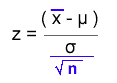

In [135]:
z_score = (np.mean(temp) - 98.6) / (np.std(temp) / np.sqrt(len(temp)))
print('The z-score is',+z_score)

p_value = st.norm.sf(abs(z_score))*2
print('The p-value is',+p_value)

The z-score is -5.475925202078116
The p-value is 4.3523151658821886e-08


##### Now try using the other test. How is the result be different? Why?

In [ ]:
Let us compare the t statistic of a one sample test:

In [111]:
t, p = st.ttest_1samp(temp, 98.6)
print('The t statistic is',+ t)
print('the p-value is',+p)

The t statistic is -5.4548232923645195
the p-value is 2.4106320415561276e-07


As you can see the z-score and t statistic are not exactly the same. Furthermore, the p-values are not the same, while they both show reject the null hypothesis. 

Since the sample size is larger than 30, the z-score is more appropriate. 


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [148]:
sample_10 = np.random.choice(temp, size=10)
print('The sample set of 10 is:',+sample_10)

z_score_10 = (np.mean(sample_10) - 98.6) / (np.std(sample_10) / np.sqrt(len(sample_10)))
print('The z-score is',+z_score_10)

p_value_10 = st.norm.sf(abs(z_score_10))*2
print('The p-value (of the z-score) is',+p_value_10)

t_10, p_10 = st.ttest_1samp(sample_10, 98.6)
print('The t statistic is',+ t_10)
print('the p-value (of the t statistic) is',+p_10)

mean_confidence_interval(sample_10)

The sample set of 10 is: [98.2 99.2 98.  98.5 98.3 97.9 96.7 97.1 98.8 98.4]
The z-score is -2.1893770644923696
The p-value (of the z-score) is 0.028569445260157422
The t statistic is -2.077025454218774
the p-value (of the t statistic) is 0.0675902479545675
Confidence interval is: 97.57632478312112 98.64367521687885


##### Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

The results are not conclusive. Why do I draw that conclusion? The z-score, t statistic, respective p-values and confidence interval change as 10 different numbers are pulled. The t statistic SHOULD be the better one to use since the sample size is smaller than 30. The results support this as the p-values for t statistic is larger than the p-value for the z-score when you pull different numbers. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

The following is the calculations of the margin of error and its confidence interval using the actual temperature dataset:

In [175]:
mean_temp = np.mean(temp)
std_temp = np.std(temp)
print('The mean is',+mean_temp)

#Calculate the z-critical value with a confidence interval of 95%
z_critical_temp = st.norm.ppf(q = 0.975) 

#Calculate the margin of error
margin_of_error_temp = z_critical_temp * std_temp 
print('margin of error is',+margin_of_error_temp)

#Confidence interval from the margin of error: (mean - margin of error, mean + margin of error)
confidence_interval_temp = (mean_temp - margin_of_error_temp,
                       mean_temp + margin_of_error_temp)  

print("Confidence interval:")
print(confidence_interval_temp)

The mean is 98.24923076923078
margin of error is 1.4314749424825415
Confidence interval:
(96.81775582674824, 99.68070571171332)


The following is using a random sample set to calculate the margin of error and its confidence interval: 

In [174]:
sample = np.random.choice(temp, size =10000)
sample_mean = np.mean(sample)
print('Sample mean is ',+sample_mean)

z_critical = st.norm.ppf(q = 0.975)                    

std_dev = np.std(sample)  # Get the population standard deviation

margin_of_error = z_critical * std_dev
print('margin of error is',+margin_of_error)

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

Sample mean is  98.24562
margin of error is 1.4156243576318541
Confidence interval:
(96.82999564236815, 99.66124435763186)


The 'abnormal' temperature is outside the confidence interval, so below 96.82 degrees and 99.68 degrees for the actual dataset. 

The 'abnormal' tempereature for the sample set is below 96.83 and above 99.66. 

As you can see the sample set does not differ much from the actual dataset. 

### 6. Is there a significant difference between males and females in normal temperature?


In [218]:
male_temp = df.temperature[df.gender == 'M']
female_temp = df.temperature[df.gender == 'F']

male_temp_mu = np.mean(male_temp)
female_temp_mu = np.mean(female_temp)
print(male_temp_mu)
print(female_temp_mu)

print('The difference between the female and male temperature is', female_temp_mu - male_temp_mu)

98.1046153846154
98.39384615384613
The difference between the female and male temperature is 0.289230769230727


There does exist a difference between the mean temperatures. 

An ECDF graph will allow us to see this visually below:

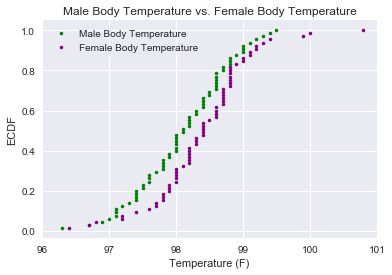

In [198]:
male_x, male_y = ecdf(male_temp)
female_x, female_y = ecdf(female_temp)

plt.plot(male_x, male_y, marker='.', linestyle='none', color='green', label = 'Male Body Temperature')
plt.plot(female_x, female_y, marker='.', linestyle='none', color ='purple', label = 'Female Body Temperature')
plt.title('Male Body Temperature vs. Female Body Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('ECDF')
plt.xlim(96, 101)
plt.legend()
plt.show()

The ECDF shows that there is a little overal variation where the female temperature is slightly higher than the male temperature. 

Let us see if calculaitons support this. 

Null hyphothesis = female and male body temperatures are the same
Alternate hypothesis = female and male body temperatures are different

In [219]:
#Generate a permutation sample, then concatenate it. Finally splot the array into two.
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2



In [220]:
#Drawing replicates of the permutation
def draw_perm_reps(data_1, data_2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
        return perm_replicates

In [221]:
#Difference of means in two arrays
def diff_of_means(data_1, data_2):
     
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

empirical_diff_means = diff_of_means(female_temp, male_temp)

perm_replicates = draw_perm_reps(female_temp, male_temp, diff_of_means, size = 10000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value is',+p)

p-value is 0.0086


C:\Users\Abha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


The p-value is 0.00 which means we can reject the null hypothesis. Which means there is a statistical signficant between the female and male temperatures. 

##### What testing approach did you use and why?

I used permutation sampling because it distributes the data evenly and then splits it, therefore, not giving a statistical advantage to either group. 

##### Write a story with your conclusion in the context of the original problem.

In conclusion, there is a difference between female and male body temperatures. Females have a slighly higher body temperature than males. In addition, the mean body temperature is not 98.6 degrees Fahrenheit as Carl Wunderlich stated for 120 years. 